In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore", message="numpy.dtype size changed")
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")

from scipy.fftpack import fft, fftshift
from scipy.signal.windows import kaiser, flattop

FONT_SMALL = 12
FONT_MEDIUM = 14

plt.rc('axes', titlesize=FONT_MEDIUM)
plt.rc('axes', labelsize=FONT_SMALL)
plt.rc('xtick', labelsize=FONT_SMALL)
plt.rc('ytick', labelsize=FONT_SMALL)
plt.rc('legend', fontsize=FONT_MEDIUM)
plt.rc('figure', titlesize=FONT_MEDIUM)

# Matplotlib default params
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['axes.edgecolor'] = 'white'
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.alpha'] = 1
# plt.rcParams['legend.loc'] = 'best'

In [ ]:
def freqtime_compare(freq=201, suptitle='', l=1):
    n = 512
    m = n*l

    # Add AWGN
    np.random.seed(42)
    awgn = np.random.normal(0, 9*1e-2, m)

    # Input signal
    t = np.linspace(0, 1, m)

    x = np.cos(2*np.pi*freq*t) + awgn
    x1 = x.reshape(l, n)
    x2 = x.reshape(l, n).sum(0)

    # FFT
    Xx = np.abs(fft(x[:n], n))[:n//2]
    X1 = (np.abs(fft(x1, n))).sum(axis=0)[:n//2]
    X2 = np.abs(fft(x2, n))[:n//2]

    Xxlog = 20*np.log10(Xx / Xx.max())
    X1log = 20*np.log10(X1 / X1.max())
    X2log = 20*np.log10(X2 / X2.max())

    fn = np.linspace(0, 0.5, n//2)

    # Plot
    plt.figure(figsize=(16, 3), dpi=120)
    plt.suptitle(suptitle)
    plt.subplot(1, 3, 1)
    plt.plot(fn, Xxlog, color='C0', label=f'N={n}')
    plt.ylim([-60, 0])
    plt.legend(loc='upper right')

    plt.subplot(1, 3, 2)
    plt.plot(fn, X1log, color='C2', label='Avg (freq)')
    plt.ylim([-60, 0])
    plt.legend(loc='upper right')

    plt.subplot(1, 3, 3)
    plt.plot(fn, X2log, color='C3', label='Avg (time)')
    plt.ylim([-60, 0])
    plt.legend(loc='upper right')

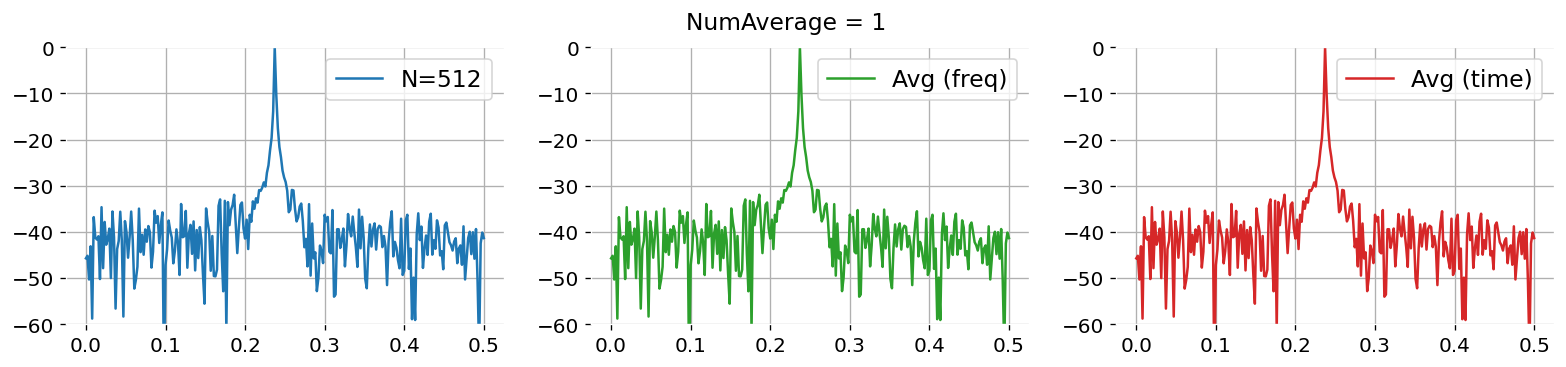

In [ ]:
freqtime_compare(freq=121*1, l=1, suptitle='NumAverage = 1')

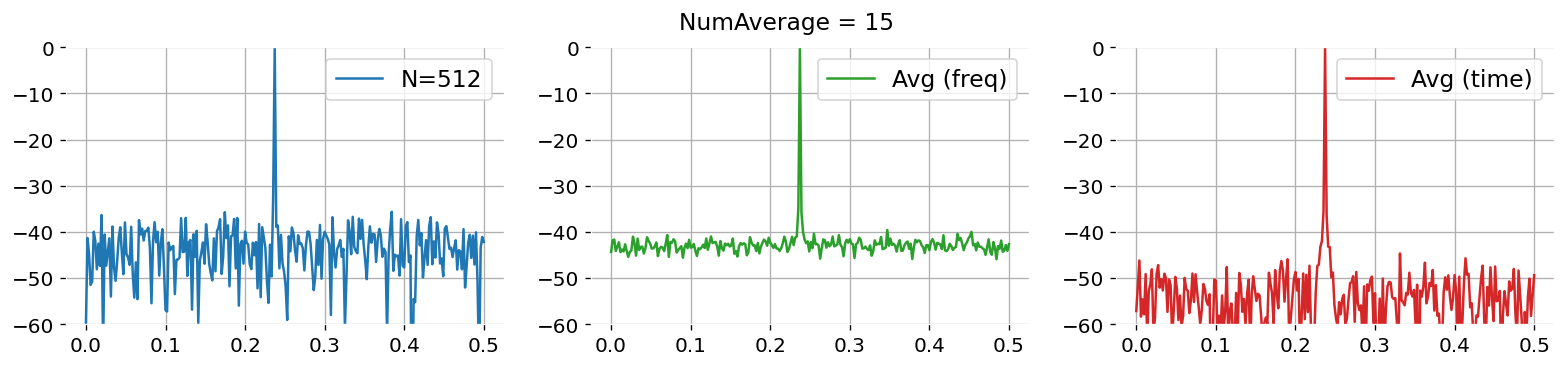

In [ ]:
l_avg = 15
freqtime_compare(freq=121*l_avg, l=l_avg, suptitle=f'NumAverage = {l_avg}')

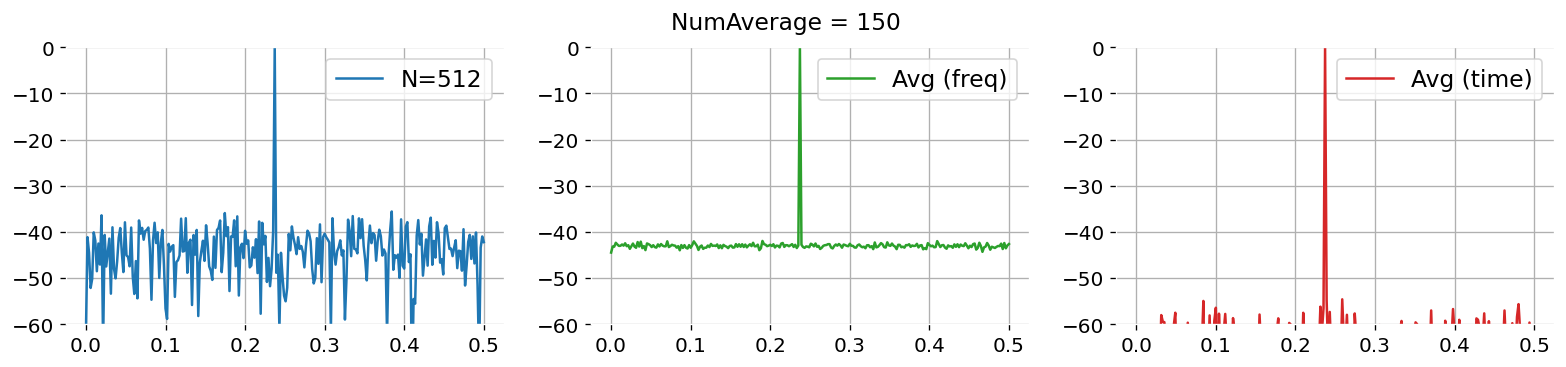

In [ ]:
l_avg = 150
freqtime_compare(freq=121*l_avg, l=l_avg, suptitle=f'NumAverage = {l_avg}')

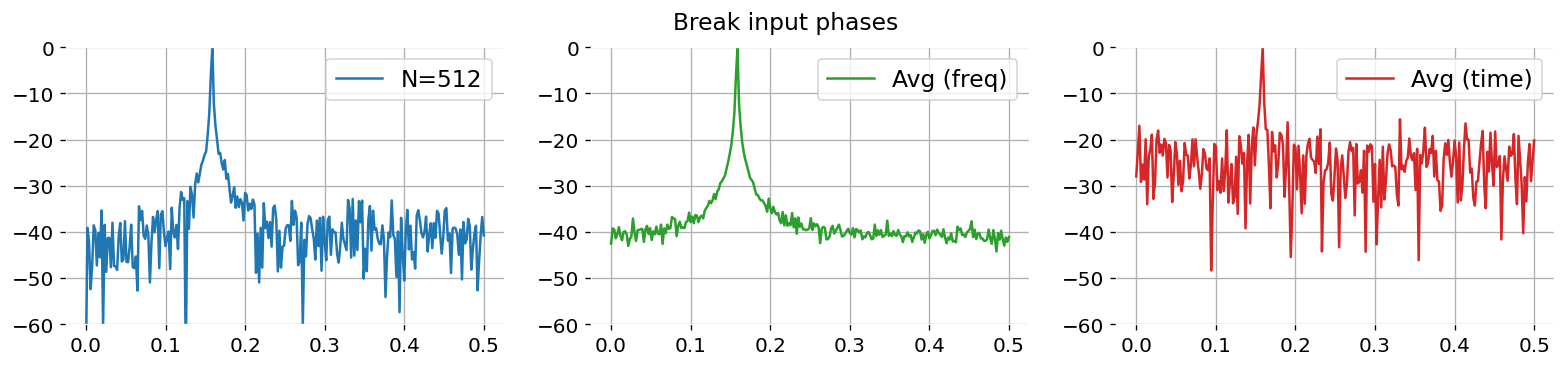

In [ ]:
freqtime_compare(freq=1210, l=15, suptitle='Break input phases')

In [ ]:
def time_compare(freq=201, l=1):
    n = 512
    m = n*l

    np.random.seed(42)
    x = np.cos(2*np.pi*freq*np.linspace(0, 1, m)) + np.random.normal(0, 9*1e-1, m)
    y = x.reshape(l, n).sum(axis=0) / l

    plt.figure(figsize=(16, 3), dpi=80)
    plt.plot(y, color='C'+str(l), label=f'Averages = {l}')
    plt.legend(loc='upper left')
    plt.xlim([0, n])
    plt.tight_layout()

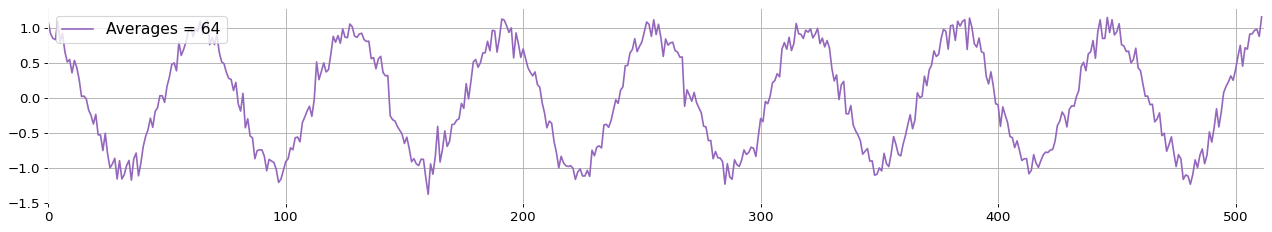

In [ ]:
time_compare(freq=512, l=64)

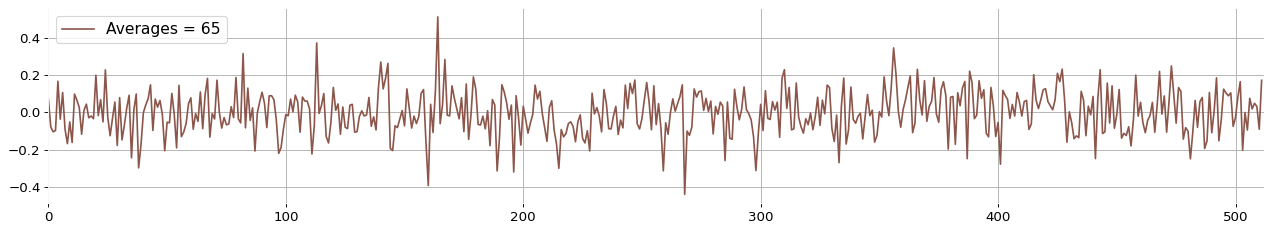

In [ ]:
time_compare(freq=512, l=65)

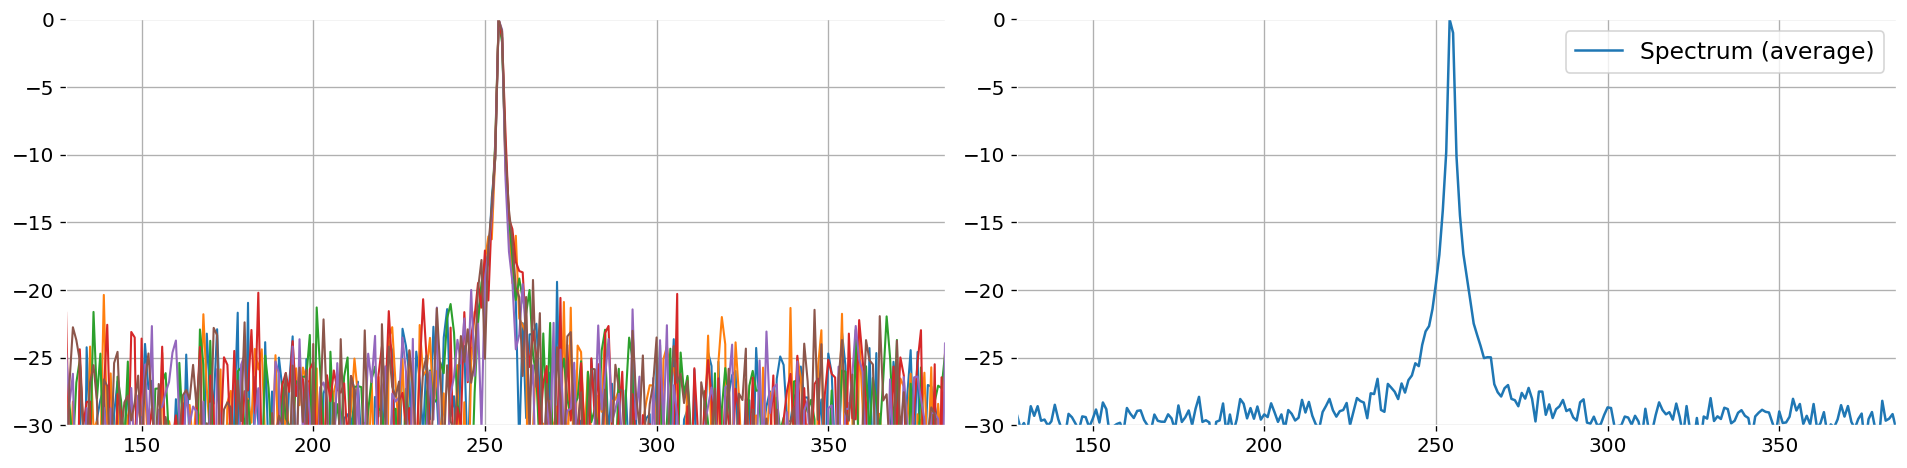

In [ ]:
def freq_only(l=32, n=512):
    # Initial Parameters
    m = l*n
    freq = l*(n/4 - 1.5374)

    # Input signal
    np.random.seed(42)
    x = np.cos(2*np.pi*freq*np.linspace(0, 1, m)) + np.random.normal(0, 4*1e-1, m)
    x = x.reshape(l, n)

    y1 = np.abs(fft(x, n))
    y2 = y1.sum(axis=0)

    y1log = 20*np.log10(y1.T / y1.max(axis=1))
    y2log = 20*np.log10(y2 / y2.max())

    plt.figure(figsize=(16, 4), dpi=120)
    plt.subplot(1, 2, 1)
    plt.plot(y1log[:n//2,:6], linewidth=1.25)
    plt.ylim([-30, 0])
    plt.xlim([n//4-n//8, n//4+n//8])
    plt.subplot(1, 2, 2)
    plt.plot(y2log[:n//2], label='Spectrum (average)')
    plt.ylim([-30, 0])
    plt.xlim([n//4-n//8, n//4+n//8])
    plt.legend()
    plt.tight_layout()

freq_only(n=1024)

In [ ]:
# Number of samples: N
# Number of parts: L
# Total length of signal: M
N, L = 16, 3
M = N*L

# Input signal
t = np.linspace(0, 1, M)
f1, f2 = L, 4*L

x = np.cos(2*np.pi*f1*t) + np.cos(2*np.pi*f2*t)
y = x.reshape(L, N).sum(0)

# FFT - M size
XM = np.abs(fft(x, M))[:M//2]
XM /= XM.max()

# FFT - N size
XN = np.abs(fft(y, N))[:N//2]
XN /= XN.max()

# Interpolated spectrum
XZ = np.zeros(M//2)
#XZ[::L] = XM[::L]
XZ[::L] = XN

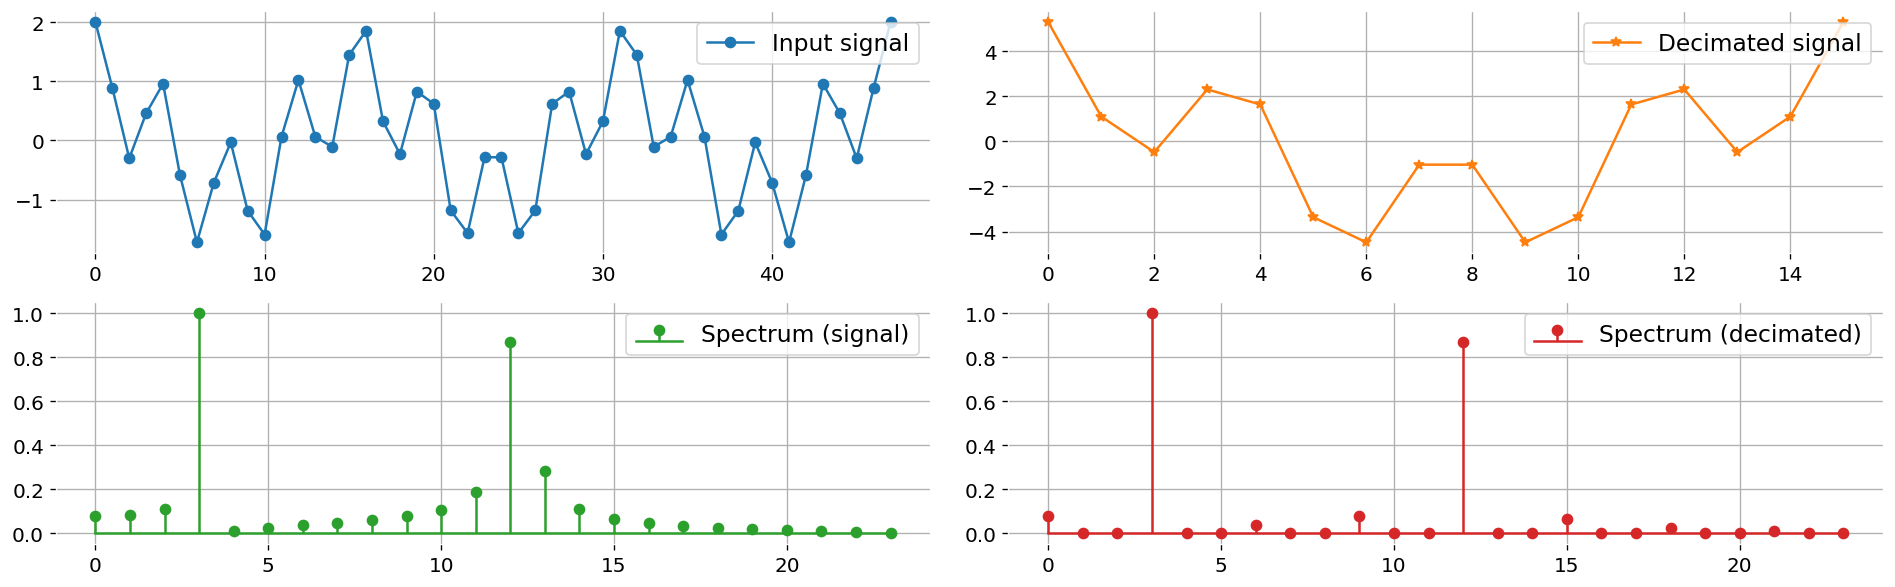

In [ ]:
plt.figure(figsize=(16, 5), dpi=120)
plt.subplot(2, 2, 1)
plt.plot(x, '-o', markersize=6, color='C0', label='Input signal')
plt.legend(loc='upper right')
plt.subplot(2, 2, 2)
plt.plot(y, '-*', markersize=6, color='C1', label='Decimated signal')
plt.legend(loc='upper right')
plt.subplot(2, 2, 3)
plt.stem(XM, linefmt='C2', basefmt='C2', label='Spectrum (signal)')
plt.legend(loc='upper right')
plt.subplot(2, 2, 4)
plt.stem(XZ,  linefmt='C3', basefmt='C3', label='Spectrum (decimated)')
plt.legend(loc='upper right')
plt.tight_layout()

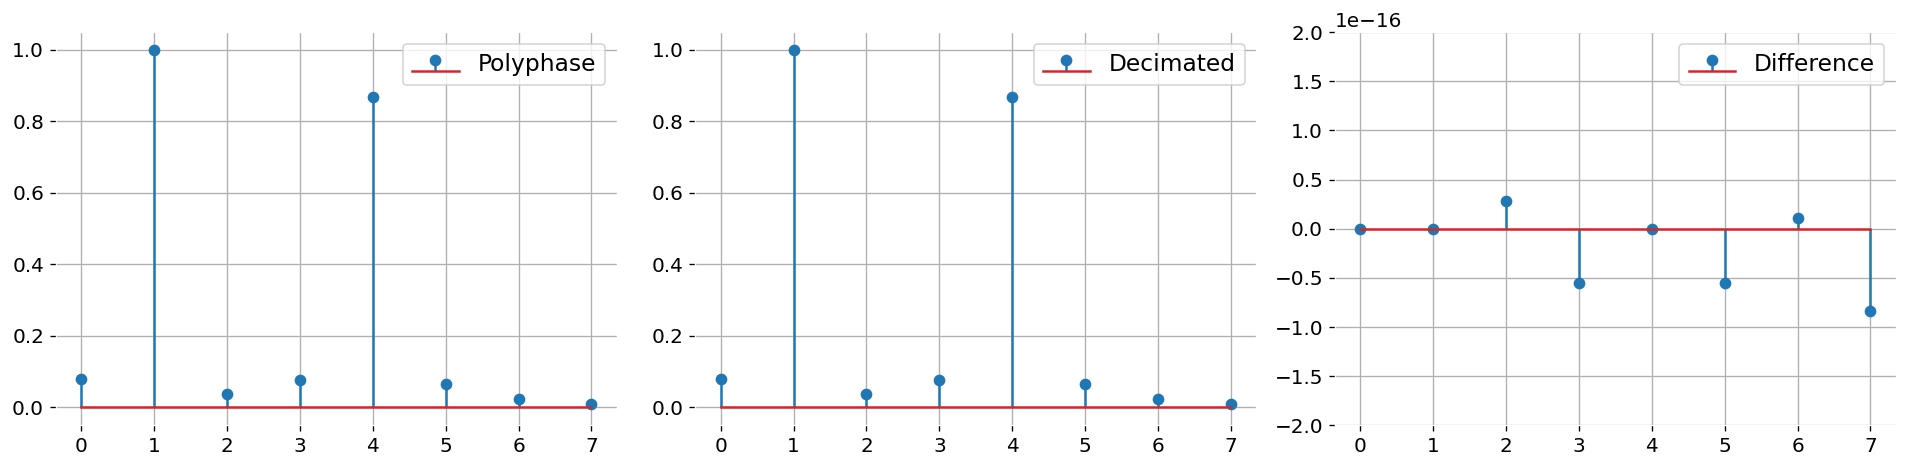

In [ ]:
plt.figure(figsize=(16, 4), dpi=120)
plt.subplot(1, 3, 1)
plt.stem(XN,
         label='Polyphase'
        )
plt.legend(loc='upper right')

plt.subplot(1, 3, 2)
plt.stem(XM[::L],
         label='Decimated'
        )
plt.legend(loc='upper right')

plt.subplot(1, 3, 3)
plt.stem(XN-XM[::L],
         label='Difference'
        )

plt.ylim(1e-16*np.array([-2, 2]))
plt.legend(loc='upper right')
plt.tight_layout()

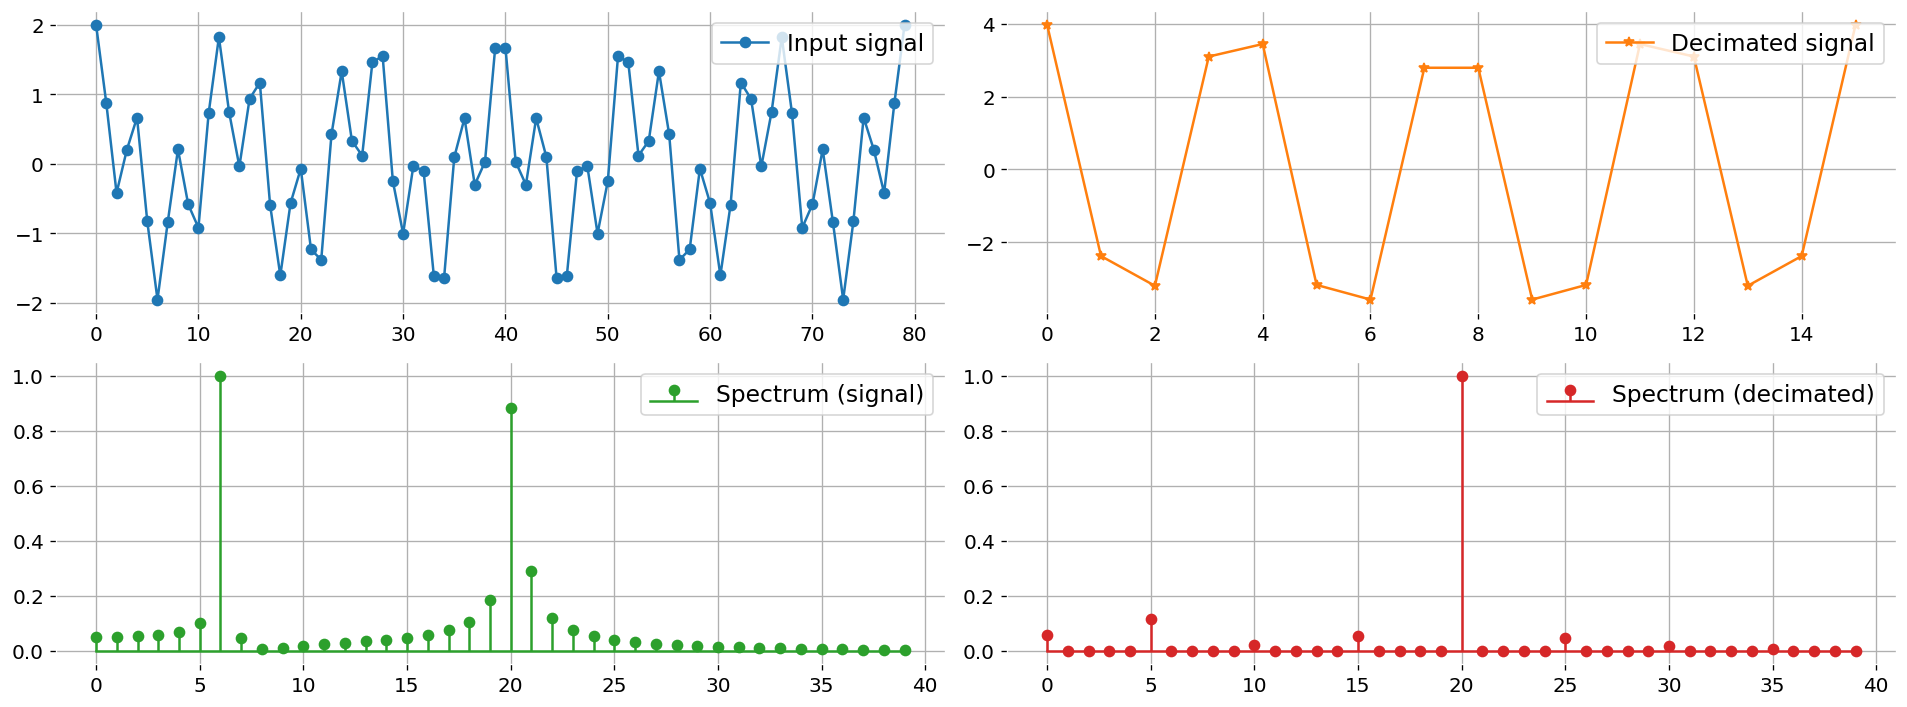

In [ ]:
# Input signal
N, L = 16, 5
M = N*L

t = np.linspace(0, 1, M)
f1, f2 = L+1, 4*L

x = np.cos(2*np.pi*f1*t) + np.cos(2*np.pi*f2*t)
y = x.reshape(L, N).sum(0)

# FFT
XM = np.abs(fft(x, M))[:M//2]
XN = np.abs(fft(y, N))[:N//2]
XM /= XM.max()
XN /= XN.max()

# Interpolated spectrum
XZ = np.zeros(M//2)
#XZ[::L] = XM[::L]
XZ[::L] = XN

plt.figure(figsize=(16, 6), dpi=120)
plt.subplot(2, 2, 1)
plt.plot(x, '-o', markersize=6, color='C0', label='Input signal')
plt.legend(loc='upper right')
plt.subplot(2, 2, 2)
plt.plot(y, '-*', markersize=6, color='C1', label='Decimated signal')
plt.legend(loc='upper right')
plt.subplot(2, 2, 3)
plt.stem(XM, linefmt='C2', basefmt='C2', label='Spectrum (signal)')
plt.legend(loc='upper right')
plt.subplot(2, 2, 4)
plt.stem(XZ, linefmt='C3', basefmt='C3', label='Spectrum (decimated)')
plt.legend(loc='upper right')
plt.tight_layout()

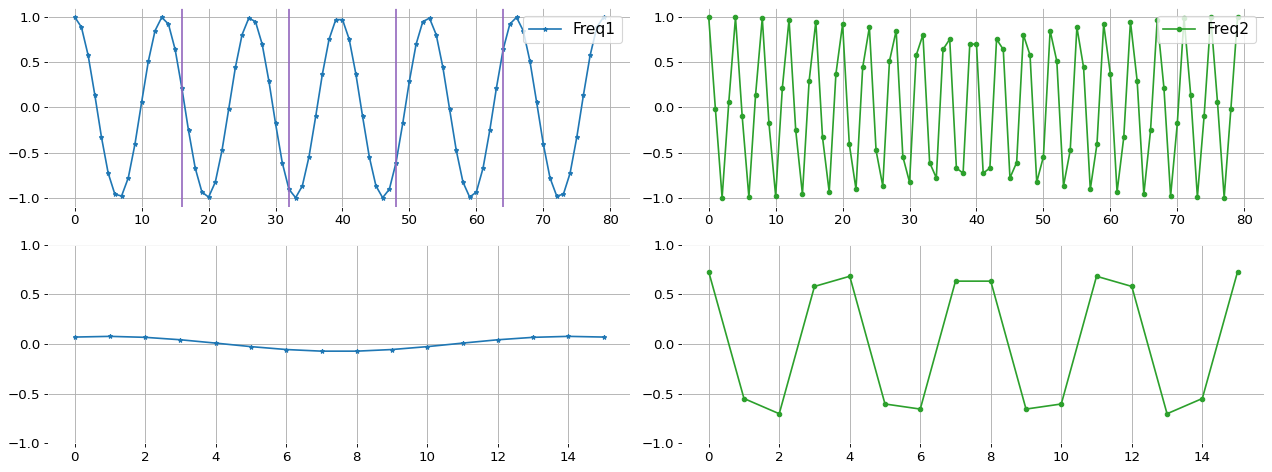

In [ ]:
plt.figure(figsize=(16, 6), dpi=80)
plt.subplot(2, 2, 1)
plt.plot(np.cos(2*np.pi*f1*t), '-*', markersize=4, color='C0', label='Freq1')
for i in range(1, L):
    plt.axvline(i*N, color='C4', linewidth=1.5)
plt.legend(loc='upper right')

plt.subplot(2, 2, 2)
plt.plot(np.cos(2*np.pi*f2*t), '-o', markersize=4, color='C2', label='Freq2')
plt.legend(loc='upper right')

plt.subplot(2, 2, 3)
plt.plot(np.cos(2*np.pi*f1*t).reshape(L, N).sum(0) / L, '-*', markersize=4, color='C0', label='Freq1')
plt.ylim([-1, 1])

plt.subplot(2, 2, 4)
plt.plot(np.cos(2*np.pi*f2*t).reshape(L, N).sum(0) / L, '-o', markersize=4, color='C2', label='Freq2')
plt.ylim([-1, 1])
plt.tight_layout()

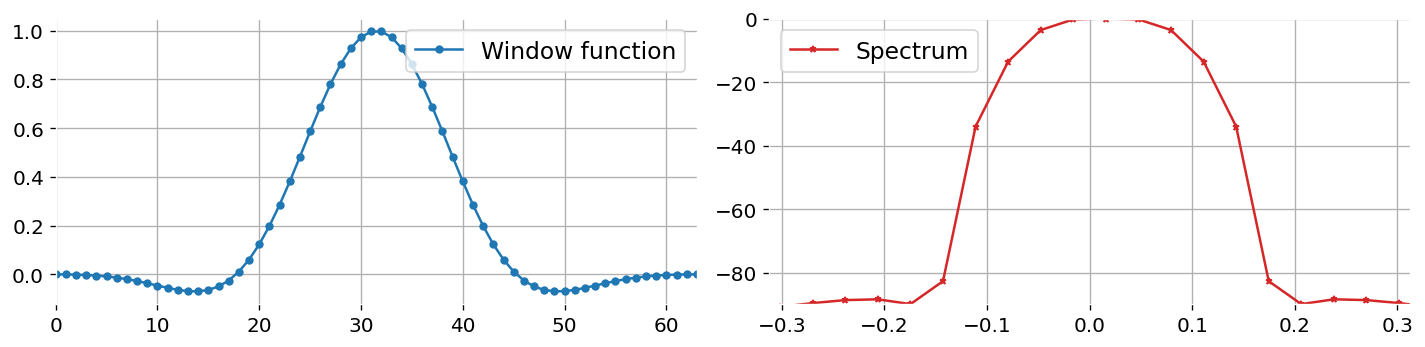

In [ ]:
# Window function: flattop
Nfft = 64

win_freq = np.linspace(-1, 1, Nfft)
win_flat = flattop(Nfft) # from scipy

win_ffts = fftshift(np.abs(fft(win_flat, Nfft)))
win_ffts = win_ffts / np.amax(win_ffts, axis=0) + np.nextafter(0,1)
win_logs = 20*np.log10(win_ffts)

# Plot results
plt.figure(figsize=(12, 3), dpi=120)
plt.subplot(1, 2, 1)
plt.plot(win_flat, '-o', markersize=4, label='Window function')
plt.legend(loc='upper right')
plt.xlim([0, Nfft-1])

plt.subplot(1, 2, 2)
plt.plot(win_freq, win_logs,'-*', markersize=4, color='C3', label='Spectrum')
plt.xlim([-20/Nfft, 20/Nfft])
plt.ylim([-90, 0])
plt.legend(loc='upper left')
plt.tight_layout()

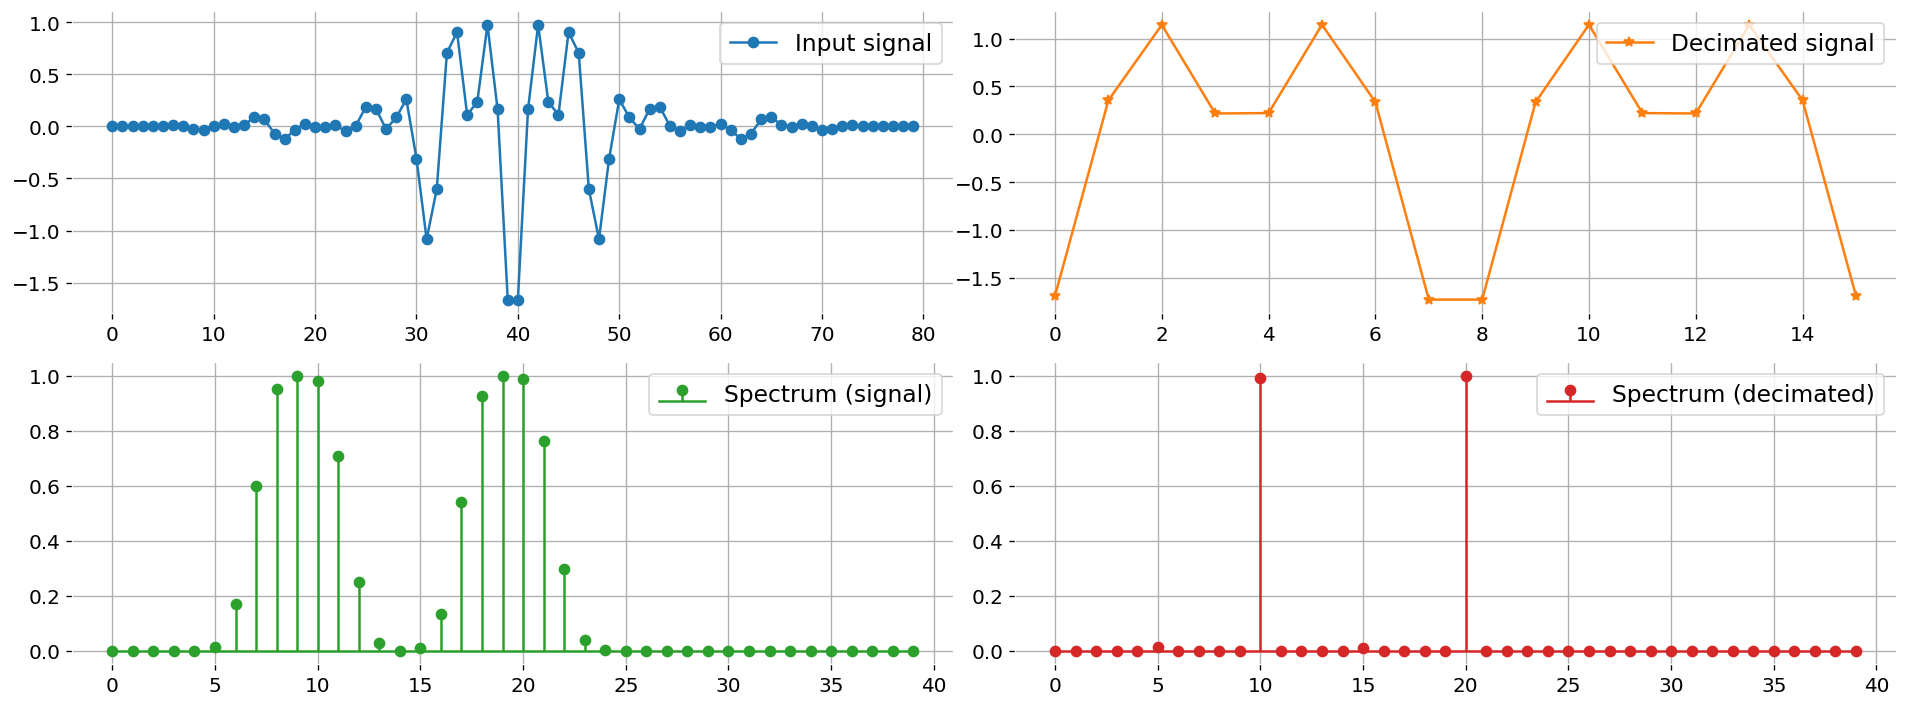

In [ ]:
N, L = 16, 5
M = N*L

# Input signal + Window Function
#wn = kaiser(M, beta=13)
wn = flattop(M)

t = np.linspace(0, 1, M)
f1, f2 = 2*L-1, 4*L-1
x = np.cos(2*np.pi*f1*t) + np.cos(2*np.pi*f2*t)
x *= wn
y = x.reshape(L, N).sum(0)

# FFT - M size
XM = np.abs(fft(x, M))[:M//2]
XM /= XM.max()

# FFT - N size
XN = np.abs(fft(y, N))[:N//2]
XN /= XN.max()

# Interpolated spectrum
XZ = np.zeros(M//2)
#XZ[::L] = XM[::L]
XZ[::L] = XN

plt.figure(figsize=(16, 6), dpi=120)
plt.subplot(2, 2, 1)
plt.plot(x, '-o', markersize=6, color='C0', label='Input signal')
plt.legend(loc='upper right')
plt.subplot(2, 2, 2)
plt.plot(y, '-*', markersize=6, color='C1', label='Decimated signal')
plt.legend(loc='upper right')
plt.subplot(2, 2, 3)
plt.stem(XM, linefmt='C2', basefmt='C2', label='Spectrum (signal)')
plt.legend(loc='upper right')
plt.subplot(2, 2, 4)
plt.stem(XZ, linefmt='C3', basefmt='C3', label='Spectrum (decimated)')
plt.legend(loc='upper right')
plt.tight_layout()

In [ ]:
def calculate_ffts(f1, f2, n, step, beta=7, use_win=False):
    # Time vector
    m = n*step
    t = np.linspace(0, 1, m)
    # Add AWGN
    np.random.seed(42)
    awgn = np.random.normal(0, 2*1e-3, m)
    # Signal, window function, polyphase FFTs
    wn = kaiser(m, beta=beta)
    x = np.cos(2*np.pi*f1*t) + np.cos(2*np.pi*f2*t) + awgn

    y = (x * wn).reshape(step, n).sum(0)

    if use_win:
        x *= wn

    # FFT - M size
    XW = np.abs(fft(x, n))[:n//2]
    XW /= XW.max()
    # FFT - N size
    XN = np.abs(fft(y, n))[:n//2]
    XN /= XN.max()
    # Log spectrum
    XWlog = 20*np.log10(XW / XW.max())
    XNlog = 20*np.log10(XN / XN.max())

    return XWlog, XNlog

nfft, step = 2048, 4
Xw = np.zeros([6, nfft//2])
Xn = np.zeros([6, nfft//2])

Xw[0], Xn[0] = calculate_ffts(182, 312, nfft, step, use_win=True)
Xw[1], Xn[1] = calculate_ffts(184, 312, nfft, step)
Xw[2], Xn[2] = calculate_ffts(184, 312, nfft, step, beta=150)
Xw[3], Xn[3] = calculate_ffts(184, 192, nfft, step, beta=300)
Xw[4], Xn[4] = calculate_ffts(184, 200, nfft, step, beta=1)
Xw[5], Xn[5] = calculate_ffts(185, 191, nfft, step)

xs_titles = ['Loss signal at 1st freq',
             'Determine both freqs',
             'Change window function',
             'Bad window function',
             'No window function',
             'Improve freq resolution',
            ]

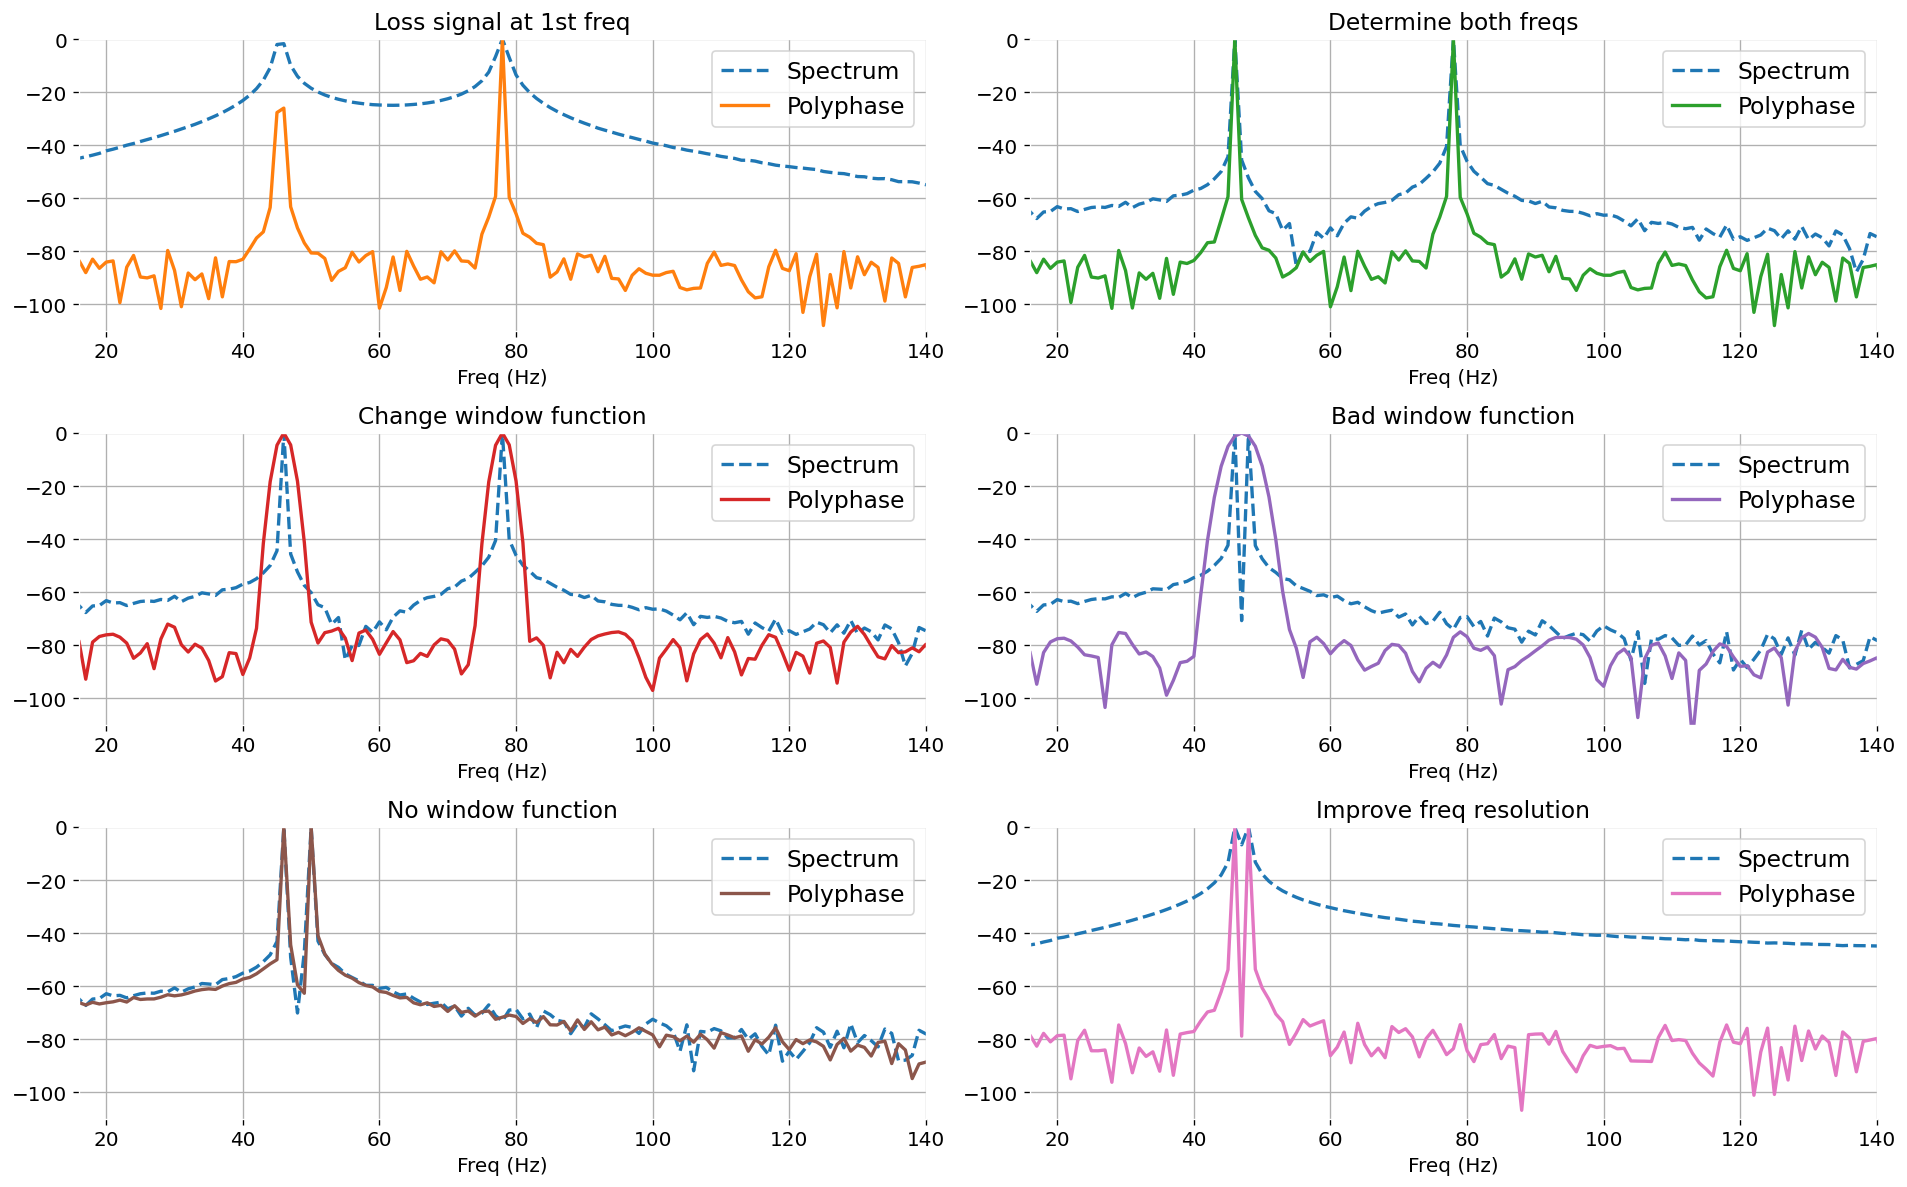

In [ ]:
plt.figure(figsize=(16, 10), dpi=120)
for i in range(6):
    plt.subplot(3, 2, i+1)
    plt.title(xs_titles[i])
    plt.plot(Xw[i], '--', linewidth=2, label='Spectrum')
    plt.plot(Xn[i], label='Polyphase', linewidth=2, color='C'+str(1+i))
    plt.xlim([16, 140])
    plt.ylim([-110, 0])
    plt.xlabel('Freq (Hz)')
    plt.legend(loc='upper right')
    plt.tight_layout()

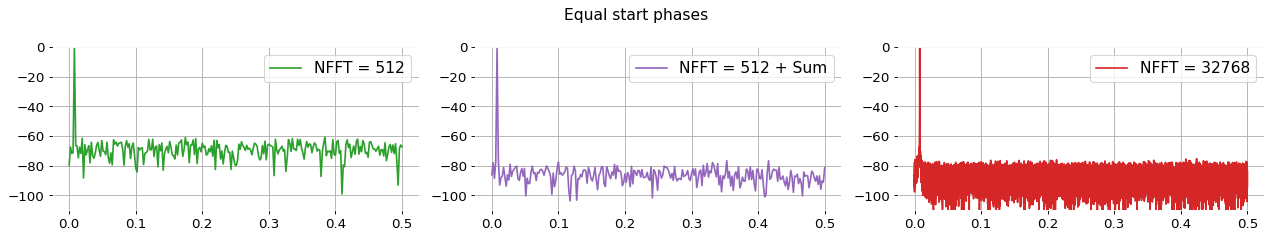

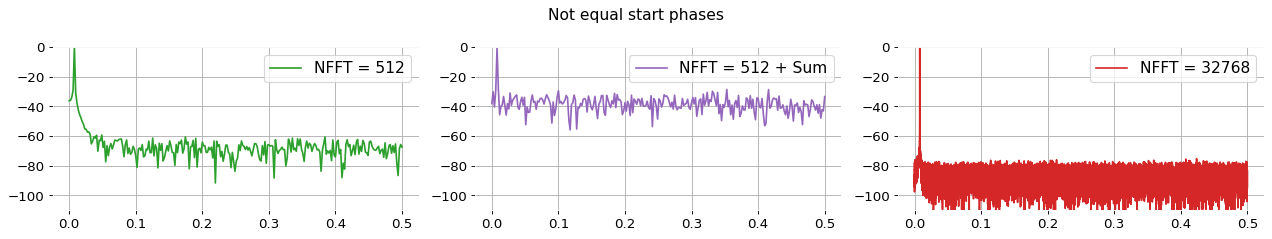

In [ ]:
def signals_compare(freq=280, suptitle=''):
    N, L = 512, 64
    M = N*L

    # Input signal
    np.random.seed(42)
    x1 = np.cos(2*np.pi*freq*np.linspace(0, 1, M)) + np.random.normal(0, 5*1e-3, M)
    x2 = np.copy(x1[:N])
    x3 = x1.reshape(L, N).sum(0)

    # FFT - M size
    XM = np.abs(fft(x1, M))[:M//2]
    XN = np.abs(fft(x2, N))[:N//2]
    XS = np.abs(fft(x3, N))[:N//2]

    XNlog = 20*np.log10(XN / XN.max())
    XMlog = 20*np.log10(XM / XM.max())
    XSlog = 20*np.log10(XS / XS.max())

    fn = np.linspace(0, 0.5, N//2)
    fm = np.linspace(0, 0.5, M//2)

    plt.figure(figsize=(16, 3), dpi=80)
    plt.suptitle(suptitle)
    plt.subplot(1, 3, 1)
    plt.plot(fn, XNlog, color='C2', label=f'NFFT = {N}')
    plt.ylim([-110, 0])
    plt.legend(loc='upper right')

    plt.subplot(1, 3, 2)
    plt.plot(fn, XSlog, color='C4', label=f'NFFT = {N} + Sum')
    plt.ylim([-110, 0])
    plt.legend(loc='upper right')

    plt.subplot(1, 3, 3)
    plt.plot(fm, XMlog, color='C3', label=f'NFFT = {M}')
    plt.ylim([-110, 0])
    plt.legend(loc='upper right')
    plt.tight_layout()

signals_compare(freq=256, suptitle='Equal start phases')
signals_compare(freq=258, suptitle='Not equal start phases')